In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import IPython
from scipy.signal import find_peaks

In [2]:
# Initially, I used the following code in MatLab to convert the .mat data files to csv
# csvwrite('NCO_big_1332.csv', NCO_01)
# csvwrite('P_big_1332.csv', P_01)
# csvwrite('T_big_1332.csv', T_01)
# a different code was used for each run of the data, 1332 pertains to Run 01

In [3]:
# Importing data as dataframes by calling the first data csv file NCO_# and adding columns from T_# and P_#

run1 = pd.read_csv('NCO_01.csv', header=None, names=['NCO1']) #create run1 dataframe
run1['Pressure1'] = pd.read_csv('P_01.csv', header=None) #append run1 with Pressure data from run 01
run1['Temperature1'] = pd.read_csv('T_01.csv', header=None) #append run1 with Temperature data from run 01

# the above steps were repeated for each run
run5 = pd.read_csv('NCO_05.csv', header=None, names=['NCO5'])
run5['Pressure5'] = pd.read_csv('P_05.csv', header=None)
run5['Temperature5'] = pd.read_csv('T_05.csv', header=None)

run9 = pd.read_csv('NCO_09.csv', header=None, names=['NCO9'])
run9['Pressure9'] = pd.read_csv('P_09.csv', header=None)
run9['Temperature9'] = pd.read_csv('T_09.csv', header=None)

run11 = pd.read_csv('NCO_11.csv', header=None, names=['NCO11'])
run11['Pressure11'] = pd.read_csv('P_11.csv', header=None)
run11['Temperature11'] = pd.read_csv('T_11.csv', header=None)

In [4]:
# each property from all the runs in combined into a single dataframe for each property
# a total of 3 dataframes was created

NCO = pd.concat([run1['NCO1'], run5['NCO5'], run9['NCO9'], run11['NCO11']], axis=1)
Pressure = pd.concat([run1['Pressure1'], run5['Pressure5'], run9['Pressure9'], run11['Pressure11']], axis=1)
Temperature = pd.concat([run1['Temperature1'], run5['Temperature5'], run9['Temperature9'], run11['Temperature11']], axis=1)

In [5]:
# checking data, cross-reference with the .csv file to make sure no data was cut off
# from the top

print(run1.head())
print(run5.head())
print(run9.head())
print(run11.head())

           NCO1  Pressure1  Temperature1
0  3.558400e+17       2.51        2919.2
1  5.569900e+17       2.49        2833.9
2  7.094200e+17       2.35        2765.3
3  8.750300e+17       2.25        2758.2
4  1.082600e+18       2.37        2753.4
           NCO5  Pressure5  Temperature5
0  6.028600e+16    0.57403        2249.0
1  5.762000e+16    0.64954        1932.8
2  5.544700e+16    0.61679        2026.4
3  6.341100e+16    0.75650        1865.9
4  7.941800e+16    0.83119        2535.5
           NCO9  Pressure9  Temperature9
0  1.564200e+17     1.6436        1841.7
1  1.604000e+17     1.5679        2061.3
2  1.875900e+17     1.6334        2124.7
3  2.010000e+17     1.5393        2050.1
4  2.326600e+17     1.6057        2144.8
          NCO11  Pressure11  Temperature11
0  5.865700e+17     0.69161         2023.4
1  5.813200e+17     0.65457         1911.5
2  5.633000e+17     0.64446         1765.3
3  5.300100e+17     0.59695         1562.2
4  5.420200e+17     0.61506         1591.2


In [6]:
# checking data, cross-reference with the above run files to make sure no data was cut
# off from the top

print(NCO.head())
print(Pressure.head())
print(Temperature.head())

           NCO1          NCO5          NCO9         NCO11
0  3.558400e+17  6.028600e+16  1.564200e+17  5.865700e+17
1  5.569900e+17  5.762000e+16  1.604000e+17  5.813200e+17
2  7.094200e+17  5.544700e+16  1.875900e+17  5.633000e+17
3  8.750300e+17  6.341100e+16  2.010000e+17  5.300100e+17
4  1.082600e+18  7.941800e+16  2.326600e+17  5.420200e+17
   Pressure1  Pressure5  Pressure9  Pressure11
0       2.51    0.57403     1.6436     0.69161
1       2.49    0.64954     1.5679     0.65457
2       2.35    0.61679     1.6334     0.64446
3       2.25    0.75650     1.5393     0.59695
4       2.37    0.83119     1.6057     0.61506
   Temperature1  Temperature5  Temperature9  Temperature11
0        2919.2        2249.0        1841.7         2023.4
1        2833.9        1932.8        2061.3         1911.5
2        2765.3        2026.4        2124.7         1765.3
3        2758.2        1865.9        2050.1         1562.2
4        2753.4        2535.5        2144.8         1591.2


In [7]:
# remove 'NaN' from the data files
# this was done because the files were not all the same size, originally, and the
# smaller data sets will fill with NaN where there was no data to match the larger
# datasets.  correlations and comparisons require equally sized datasets.

NCOAll = pd.DataFrame.dropna(NCO, axis=0)
PresAll = pd.DataFrame.dropna(Pressure, axis=0)
TempAll = pd.DataFrame.dropna(Temperature, axis=0)

In [8]:
# checking lengths for all dataframes for comparison

print(run1.shape)
print(run5.shape)
print(run9.shape)
print(run11.shape)
print(NCOAll.shape)
print(PresAll.shape)
print(TempAll.shape)

(780853, 3)
(377296, 3)
(779528, 3)
(404334, 3)
(372913, 4)
(372913, 4)
(372913, 4)


In [9]:
# Comparing max Pressure in each run
print(max(run1['Pressure1'])) # 
print(max(run5['Pressure5']))
print(max(run9['Pressure9']))
print(max(run11['Pressure11']))

5.78
5.2519
6.2109
1.8232


In [10]:
# Comparing max NCO in each run
print(max(run1['NCO1']))
print(max(run5['NCO5']))
print(max(run9['NCO9']))
print(max(run11['NCO11']))

1.0628e+19
1.2962e+18
9.4954e+18
1.4662e+18


In [11]:
# checking correlation between properties within each run
print(run1.corr())
print(run5.corr())
print(run9.corr())
print(run11.corr())

                  NCO1  Pressure1  Temperature1
NCO1          1.000000   0.577754      0.384454
Pressure1     0.577754   1.000000      0.846556
Temperature1  0.384454   0.846556      1.000000
                  NCO5  Pressure5  Temperature5
NCO5          1.000000   0.587932      0.389169
Pressure5     0.587932   1.000000      0.593298
Temperature5  0.389169   0.593298      1.000000
                  NCO9  Pressure9  Temperature9
NCO9          1.000000   0.532836      0.296858
Pressure9     0.532836   1.000000      0.781990
Temperature9  0.296858   0.781990      1.000000
                  NCO11  Pressure11  Temperature11
NCO11          1.000000    0.670879       0.052715
Pressure11     0.670879    1.000000       0.518908
Temperature11  0.052715    0.518908       1.000000


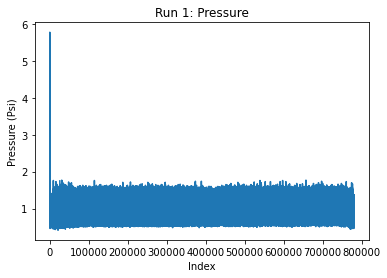

In [46]:
# Visualize the data

x1 = 0
y1 = len(run1)
plt.plot(range(x1, y1), run1['Pressure1'][x1:y1])
plt.xlabel('Index')
plt.ylabel('Pressure (Psi)')
plt.title('Run 1: Pressure')
plt.savefig("Run1 Whole.png")
plt.show()

x5 = 0
y5 = len(run5)
ax5 = plt.plot(range(x5, y5), run5['Pressure5'][x5:y5])
plt.show()

x9 = 0
y9 = len(run9)
ax9 = plt.plot(range(x9, y9), run9['Pressure9'][x9:y9])
plt.show()

#x11 = 0
#y11 = len(run5)
#ax11 = plt.plot(range(x11, y11), run11['Pressure11'][x11:y11])
#plt.show()

           NCO1      NCO5      NCO9     NCO11
NCO1   1.000000  0.004102  0.163323  0.011480
NCO5   0.004102  1.000000  0.006424  0.002297
NCO9   0.163323  0.006424  1.000000  0.005051
NCO11  0.011480  0.002297  0.005051  1.000000
            Pressure1  Pressure5  Pressure9  Pressure11
Pressure1    1.000000   0.002001   0.025069    0.001386
Pressure5    0.002001   1.000000  -0.000847   -0.002962
Pressure9    0.025069  -0.000847   1.000000    0.000839
Pressure11   0.001386  -0.002962   0.000839    1.000000
               Temperature1  Temperature5  Temperature9  Temperature11
Temperature1       1.000000      0.006734      0.016159       0.005892
Temperature5       0.006734      1.000000     -0.001531      -0.000467
Temperature9       0.016159     -0.001531      1.000000       0.002253
Temperature11      0.005892     -0.000467      0.002253       1.000000


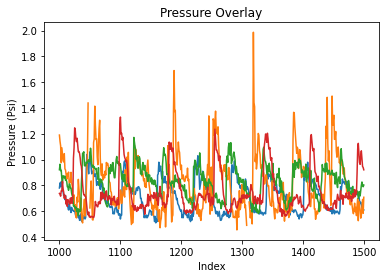

In [48]:
# determine any correlation between all properties from all runs
print(NCOAll.corr())
print(PresAll.corr())
print(TempAll.corr())

# overlaying the data from the same segments, visually inspect for possible
# lag determination

x1 = 1000
y1 = 1500
figure, ax1 = plt.subplots()
ax1.plot(range(x1, y1), run1['Pressure1'][x1:y1])
ax1.plot(range(x1, y1), run5['Pressure5'][x1:y1])
ax1.plot(range(x1, y1), run9['Pressure9'][x1:y1])
ax1.plot(range(x1, y1), run11['Pressure11'][x1:y1])
ax1.set_xlabel('Index')
ax1.set_ylabel('Pressure (Psi)')
ax1.set_title('Pressure Overlay')
plt.savefig("overlay.png")

In [14]:
#  fft analysis for pressure on all runs

pres1 = np.array(PresAll['Pressure1'])
pres1fft = np.fft.fft(pres1)
presfreq1 = np.fft.fftfreq(len(PresAll['Pressure1']), 1/500000)
power1 = np.abs(pres1fft)**2

pres5 = np.array(PresAll['Pressure5'])
pres5fft = np.fft.fft(pres5)
presfreq5 = np.fft.fftfreq(len(PresAll['Pressure5']), 1/500000)
power5 = np.abs(pres5fft)**2

pres9 = np.array(PresAll['Pressure9'])
pres9fft = np.fft.fft(pres9)
presfreq9 = np.fft.fftfreq(len(PresAll['Pressure9']), 1/500000)
power9 = np.abs(pres9fft)**2

pres11 = np.array(PresAll['Pressure11'])
pres11fft = np.fft.fft(pres11)
presfreq11 = np.fft.fftfreq(len(PresAll['Pressure11']), 1/500000)
power11 = np.abs(pres11fft)**2

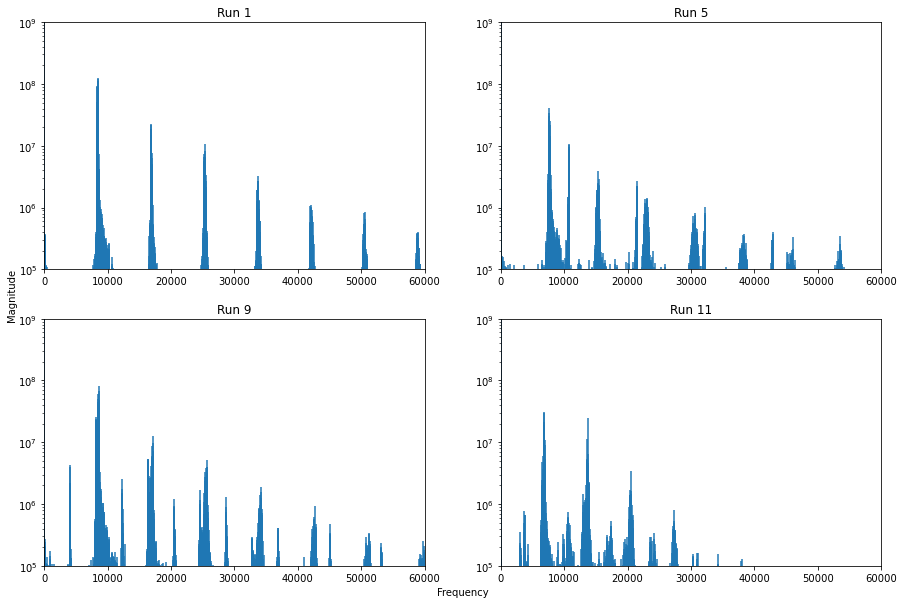

In [49]:
# visualization of the fft
# reduced y-axis limit to cut out lower frequencies
x1 = -10
x2 = 60000

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_xlabel('Frequency')
ax.set_ylabel('Magnitude')

presfreq = [presfreq1, presfreq5, presfreq9, presfreq11]
power = [power1, power5, power9, power11]
run = [1, 5, 9, 11]
j = 0

for x in range(0, 4): #generates 4 subplots of the fft with restricted xlimits to get a closer look
    j = j + 1
    index = int('22' + str(j))
    ax = fig.add_subplot(index)
    ax.stem(presfreq[x], power[x], markerfmt = ' ')
    ax.set_xlim([x1, x2])
    ax.set_ylim([10e4, 10e8])
    ax.set_title('Run ' + str(run[x]))
    plt.yscale('log')
    
plt.savefig('fft_analysis.png')

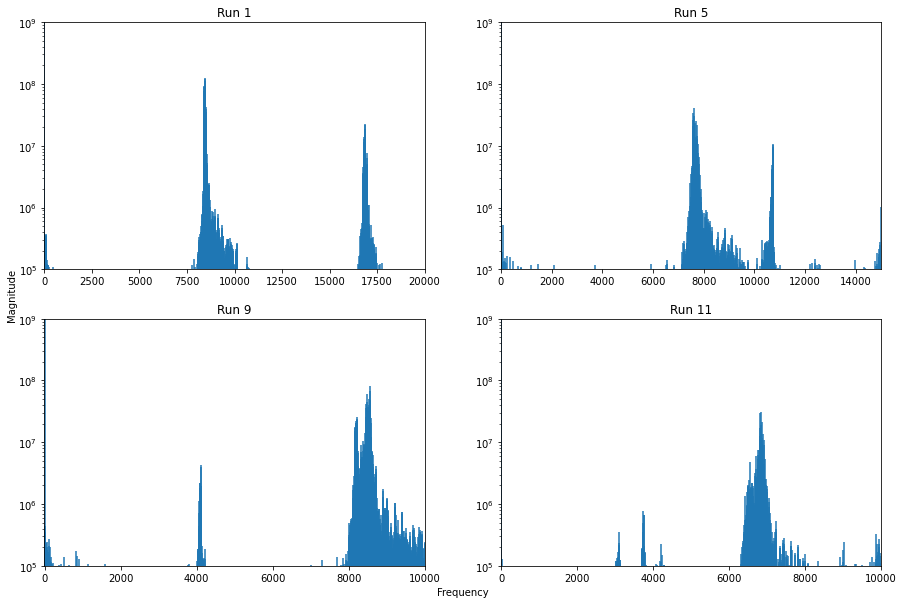

In [16]:
# a closer look at frequency for better determination

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_xlabel('Frequency')
ax.set_ylabel('Magnitude')

presfreq = [presfreq1, presfreq5, presfreq9, presfreq11]
power = [power1, power5, power9, power11]
run = [1, 5, 9, 11]
x2 = [20000, 15000, 10000, 10000]
j = 0

for x in range(0, 4): #generates 4 subplots of the fft with restricted xlimits to get a closer look
    j = j + 1
    index = int('22' + str(j))
    ax = fig.add_subplot(index)
    ax.stem(presfreq[x], power[x], markerfmt = ' ')
    ax.set_xlim([-10, x2[x]])
    ax.set_ylim([10e4, 10e8])
    ax.set_title('Run ' + str(run[x]))
    plt.yscale('log')

In [17]:
# find the location for the maximum power value and use that index to identify the 1st mode frequency
index1 = np.where(power1[0:183000] == power1[100:100000].max())
freq1 = float(presfreq1[index1])

index5 = np.where(power5[0:183000] == power5[100:175000].max())
freq5 = float(presfreq5[index5])

index9 = np.where(power9[0:183000] == power9[100:175000].max())
freq9 = float(presfreq9[index9])

index11 = np.where(power11[0:183000] == power11[100:175000].max())
freq11 = float(presfreq11[index11])

print(round(freq1), "hz")
print(round(freq5), "hz")
print(round(freq9), "hz")
print(round(freq11), "hz")

8439 hz
7632 hz
8557 hz
6837 hz


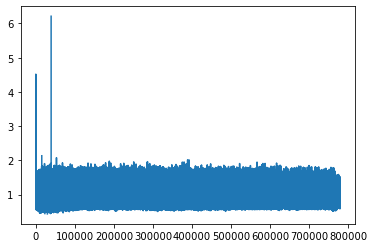

In [18]:
x9 = 0
y9 = len(run9)
ax9 = plt.plot(range(x9, y9), run9['Pressure9'][x9:y9])

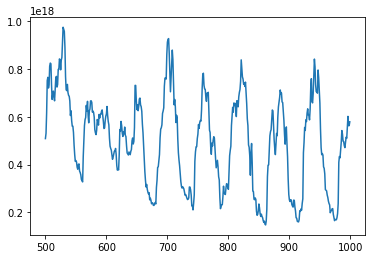

In [22]:
x11 = 500
y11 = 1000
ax11 = plt.plot(range(x11, y11), run1['NCO1'][x11:y11])

In [26]:
# attempting to find all local maximums to sum and average
NCO1 = np.array(NCOAll['NCO1'])
mu = np.mean(NCO1)
peaks1, heights1 = find_peaks(NCO1, height = mu, distance = 10)

heights1

{'peak_heights': array([1.0628e+19, 4.9169e+18, 7.8930e+18, ..., 7.5131e+17, 4.9489e+17,
        6.3397e+17])}

In [33]:
height1 = heights1['peak_heights']
height1 = list(heights1)
mu = np.mean(heights1)
sigma = np.std(heights1)
x1 = np.min(heights1)
x2 = np.max(heights1)

print(mu)
print(sigma)
print(x1)
print(x2)

TypeError: list indices must be integers or slices, not str

In [ ]:
xd = np.array(run['NCO1'])
mu = np.mean(xd)
sigma = np.std(xd)

#Apply function to the data.
pdf = norm.pdf(xd, mu, sigma)
 
#Plotting the Results
plt.plot(x, pdf, color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

In [30]:
heights1

[('peak_heights',
  array([1.0628e+19, 4.9169e+18, 7.8930e+18, ..., 7.5131e+17, 4.9489e+17,
         6.3397e+17]))]

In [ ]:
x = np.array([1, 5, 4, 20, 15])
